In [1]:
from datasets import load_dataset

ds = load_dataset("google/boolq")

/Users/adityanarvekar/genai/genaienv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
print (ds)

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'passage'],
        num_rows: 9427
    })
    validation: Dataset({
        features: ['question', 'answer', 'passage'],
        num_rows: 3270
    })
})


In [20]:
# Access the training, validation, and test splits
train_data = ds['train']
validation_data = ds['validation']



In [21]:
print(train_data[-1])

{'question': 'is margin of error the same as confidence interval', 'answer': False, 'passage': "The margin of error is usually defined as the ``radius'' (or half the width) of a confidence interval for a particular statistic from a survey. One example is the percent of people who prefer product A versus product B. When a single, global margin of error is reported for a survey, it refers to the maximum margin of error for all reported percentages using the full sample from the survey. If the statistic is a percentage, this maximum margin of error can be calculated as the radius of the confidence interval for a reported percentage of 50%."}


In [1]:
import pandas as pd

In [23]:
df_train_set = pd.DataFrame(train_data)

In [24]:
df_train_set

question  answer  \
0       do iran and afghanistan speak the same language    True   
1     do good samaritan laws protect those who help ...    True   
2     is windows movie maker part of windows essentials    True   
3     is confectionary sugar the same as powdered sugar    True   
4            is elder scrolls online the same as skyrim   False   
...                                                 ...     ...   
9422             is a us district court a federal court    True   
9423  can a tenant get a restraining order against a...    True   
9424       is the golden state warriors in the playoffs    True   
9425             downton abbey will there be a season 7   False   
9426  is margin of error the same as confidence inte...   False   

                                                passage  
0     Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...  
1     Good Samaritan laws offer legal protection to ...  
2     Windows Movie Maker (formerly known as Windows...  
3     Powdered sugar, also called confectioners' sug...  
4     As with other games in The Elder Scrolls serie...  
...                                                 ...  
9422  The United States district courts are the gene...  
9423  If a landlord is found to be retaliating, he o...  
9424  The Warriors went into the 2018 playoffs as th...  
9425  Downton Abbey is a British period drama televi...  
9426  The margin of error is usually defined as the ...  

[9427 rows x 3 columns]

In [25]:
df_test_set = pd.DataFrame(validation_data)

In [26]:
df_test_set

question  answer  \
0      does ethanol take more energy make that produces   False   
1                is house tax and property tax are same    True   
2     is pain experienced in a missing body part or ...    True   
3     is harry potter and the escape from gringotts ...    True   
4     is there a difference between hydroxyzine hcl ...    True   
...                                                 ...     ...   
3265           is manic depression the same as bi polar    True   
3266           was whiskey galore based on a true story    True   
3267  are there plants on the international space st...    True   
3268  does the hockey puck have to cross the line to...    True   
3269          will there be a season 5 of shadowhunters   False   

                                                passage  
0     All biomass goes through at least some of thes...  
1     Property tax or 'house tax' is a local tax on ...  
2     Phantom pain sensations are described as perce...  
3     Harry Potter and the Escape from Gringotts is ...  
4     Hydroxyzine preparations require a doctor's pr...  
...                                                 ...  
3265  Bipolar disorder, previously known as manic de...  
3266  SS Politician was an 8000-ton cargo ship owned...  
3267  Plant research continued on the International ...  
3268  In ice hockey, a goal is scored when the puck ...  
3269  In April 2017, it was announced that the serie...  

[3270 rows x 3 columns]

In [1]:
import os
import dotenv
from openai import AzureOpenAI



In [4]:
!pwd

/Users/adityanarvekar/Library/CloudStorage/OneDrive-SPJAINSCHOOLOFGLOBALMANAGEMENT/Research/Language Models/soft prompts


In [5]:
dotenv.load_dotenv('/Users/adityanarvekar/genai/.env')

True

In [6]:
client = AzureOpenAI(
    api_key=os.getenv("$AZURE_OPENAI_API_KEY"),  
    api_version="2024-05-01-preview",
    azure_endpoint = os.getenv("$AZURE_OPENAI_ENDPOINT")
    )

In [9]:
# get embeddings from open ai large embedding model
response = client.embeddings.create(
    input="Test sentence",
    model = 'text-embedding-3-large'
)

print(len(response.data[0].embedding))

3072


In [10]:
# get embeddings from open ai small embedding model
response = client.embeddings.create(
    input="Test sentence",
    model = 'text-embedding-3-small'
)

print(len(response.data[0].embedding))

1536


In [12]:
def get_embedding (text, model):
    response = client.embeddings.create(
    input= text,
    model = model)
    return response.data[0].embedding



In [14]:
embedding = get_embedding(' This is a test', 'text-embedding-3-small' )

In [16]:
len (embedding)

1536

In [27]:
df_train_set['q_embedding'] = df_train_set['question'].apply(lambda x:get_embedding(x,'text-embedding-3-small') )

In [28]:
df_train_set.to_parquet('train_set_with_qembeddings.parquet', compression='snappy')

In [32]:
len(df_train_set.loc[0,'q_embedding'])

1536

In [33]:
df_train_set.head(3)

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   

                                         q_embedding  
0  [-0.08950918167829514, -0.03391300514340401, 0...  
1  [0.004099148791283369, -0.02683788351714611, 0...  
2  [-0.03891529515385628, 0.025479756295681, 0.01...

In [36]:
# sample code 

import numpy as np
from sklearn.decomposition import PCA

# Sample data: 5 samples, 4 features (dimensions)
data = np.array([[0.3, 0.2, 0.7, 0.5],
                 [0.4, 0.3, 0.8, 0.6],
                 [0.5, 0.4, 0.9, 0.7],
                 [0.6, 0.5, 1.0, 0.8],
                 [0.7, 0.6, 1.1, 0.9]])

# Initialize PCA: Reduce the data to 2 dimensions
pca = PCA(n_components=0.99)

# Fit the PCA model to the data and transform it into lower dimensions
reduced_data = pca.fit_transform(data)

print("Original Data Shape:", data.shape)
print("Reduced Data Shape:", reduced_data.shape)
print("Reduced Data (2D):")
print(reduced_data)


Original Data Shape: (5, 4)
Reduced Data Shape: (5, 1)
Reduced Data (2D):
[[-0.4]
 [-0.2]
 [ 0. ]
 [ 0.2]
 [ 0.4]]


In [48]:
#embeddings = np.array ([df_train_set['q_embedding']])

#embeddings = df_train_set['q_embedding'].to_numpy()

In [49]:
embeddings.shape

(9427,)

In [53]:
len(embeddings[-1])

1536

In [56]:
embeddings = df_train_set['q_embedding'].to_list()

In [60]:
embeddings = np.array (embeddings)

In [61]:
embeddings.shape

(9427, 1536)

In [62]:
pca = PCA(n_components=0.99)

In [63]:
reduced_embeddings = pca.fit_transform(embeddings)

In [64]:
reduced_embeddings.shape

(9427, 1126)

In [79]:
# sample code


# Example query (question)
query = "What is deep learning?"

# Get embedding for the query
query_embedding = get_embedding(query, 'text-embedding-3-small')

# Convert the embedding into a string format (simple join of numbers as an example)
embedding_as_text = ' '.join(map(str, query_embedding))

# Craft a prompt using the embedding as a context
question = [{'role':'user', 'content': f"Answer the following question based on the following embedding context: {embedding_as_text}\nQuestion: {query}\nAnswer:"}]


# Generate an answer using GPT-4
response = client.chat.completions.create(
    model="gpt4o",
    messages=question,
    temperature=0.7
)

# Output the answer
print(response.choices[0].message.content)


Deep learning is a subset of machine learning in artificial intelligence (AI) that is inspired by the structure and function of the human brain. It involves the use of neural networks with many layers (hence "deep") to model and understand complex patterns in data. These networks are capable of learning from large amounts of data, making them particularly effective for tasks such as image and speech recognition, natural language processing, and autonomous driving. Deep learning models are trained using algorithms to adjust the weights of the connections between neurons, allowing the network to improve its performance over time.


In [93]:
def get_answer(question, model):
    
    response = client.chat.completions.create(
    model=model,
    messages=question,
    temperature=0)
    return response.choices[0].message.content




In [126]:
def get_answer1(question, model):
    try:
        response = client.chat.completions.create(
        model=model,
        messages=question,
        temperature=0)
        return response.choices[0].message.content
    except Exception as e:
         # If an error occurs, print the question and the error message
        print(f"Error processing question: {question}")
        print(f"Error message: {e}")
        return None

In [91]:
q = [{'role':'user','content': f'Answer the following question. Answer should be either True or False. The question is ### {x} ###'} for x in df_train_set['question'].to_list()]

In [97]:
for question in q[:1]:
    ques = [question]

print (ques)

[{'role': 'user', 'content': 'Answer the following question. Answer should be either True or False. The question is ### do iran and afghanistan speak the same language ###'}]


In [100]:
type([q[0]])

list

In [101]:
get_answer([q[0]], 'gpt4o')

'False'

In [128]:
df_train_set['gpt4o_answer'] = df_train_set['question'].apply(lambda x: get_answer1([{'role':'user','content': f'Answer the following question. Answer should be stricly boolean. Avoid punctuation in the answer. The question is ### {x} ###'}], "gpt4o"))

Error processing question: [{'role': 'user', 'content': 'Answer the following question. Answer should be stricly boolean. Avoid punctuation in the answer. The question is ### is als the same as lou gehrigs disease ###'}]
Error message: Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766", 'type': None, 'param': 'prompt', 'code': 'content_filter', 'status': 400, 'innererror': {'code': 'ResponsibleAIPolicyViolation', 'content_filter_result': {'hate': {'filtered': True, 'severity': 'medium'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}}}
Error processing question: [{'role': '

In [129]:
df_train_set.to_parquet('train_set_with_gpt4o_bool_answers.parquet', compression='snappy')

In [130]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  
0  [-0.08950918167829514, -0.03391300514340401, 0...        False  
1  [0.004099148791283369, -0.02683788351714611, 0...         true  
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true  
3  [0.01370563730597496, -0.0826801061630249, -0....         true  
4  [-0.018638623878359795, -0.009417288936674595,...           no

In [131]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question      9427 non-null   object
 1   answer        9427 non-null   bool  
 2   passage       9427 non-null   object
 3   q_embedding   9427 non-null   object
 4   gpt4o_answer  9415 non-null   object
dtypes: bool(1), object(4)
memory usage: 303.9+ KB


In [133]:
df_train_set[df_train_set['gpt4o_answer'] == 'None']

Empty DataFrame
Columns: [question, answer, passage, q_embedding, gpt4o_answer]
Index: []

In [141]:
df_train_set['gpt4o_answer'].value_counts()

gpt4o_answer
true                              3234
no                                2167
yes                               1711
False                              935
false                              488
No                                 381
Yes                                253
True                               223
Unknown                              8
unknown                              6
It depends                           4
I do not have real-time data.        1
It depends on the jurisdiction       1
live                                 1
batman bad blood                     1
fiction                              1
Name: count, dtype: int64

In [144]:
#df_train_set['gpt4o_answer_bool'] = df_train_set['gpt4o_answer'].where(df_train_set['gpt4o_answer'].isin(['true','yes','Yes','True']), True, (df_train_set['gpt4o_answer'].isin(['no','False','false','No']), False, None ))

In [145]:
# Map the possible string values to True, False, or None
df_train_set['gpt4o_answer_bool'] = df_train_set['gpt4o_answer'].map(
    lambda x: True if x in ['true', 'yes', 'Yes', 'True'] 
              else False if x in ['no', 'False', 'false', 'No'] 
              else None
)


In [146]:
df_train_set['gpt4o_answer_bool'].value_counts()

gpt4o_answer_bool
True     5421
False    3971
Name: count, dtype: int64

In [107]:
# Sample code
# Example DataFrame with string/categorical columns
data = {
    'Actual': ['cat', 'dog', 'cat', 'rabbit', 'dog'],
    'Predicted': ['cat', 'dog', 'dog', 'rabbit', 'dog']
}

df = pd.DataFrame(data)

# Compare the two columns (element-wise) and calculate accuracy
correct_predictions = (df['Actual'] == df['Predicted']).sum()
total_predictions = len(df)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [140]:
# Compute accuracy of gpt-4o

import string

correct_predictions = ((df_train_set['answer'].astype(str)) == (df_train_set['gpt4o_answer'].str.translate(str.maketrans('', '', string.punctuation)))).sum()
total_predictions = len(df_train_set)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.10


In [148]:
# Compute accuracy of gpt-4o

import string

correct_predictions = (df_train_set['answer'] == df_train_set['gpt4o_answer_bool']).sum()
total_predictions = len(df_train_set)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [149]:
df_train_set

question  answer  \
0       do iran and afghanistan speak the same language    True   
1     do good samaritan laws protect those who help ...    True   
2     is windows movie maker part of windows essentials    True   
3     is confectionary sugar the same as powdered sugar    True   
4            is elder scrolls online the same as skyrim   False   
...                                                 ...     ...   
9422             is a us district court a federal court    True   
9423  can a tenant get a restraining order against a...    True   
9424       is the golden state warriors in the playoffs    True   
9425             downton abbey will there be a season 7   False   
9426  is margin of error the same as confidence inte...   False   

                                                passage  \
0     Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1     Good Samaritan laws offer legal protection to ...   
2     Windows Movie Maker (formerly known as Windows...   
3     Powdered sugar, also called confectioners' sug...   
4     As with other games in The Elder Scrolls serie...   
...                                                 ...   
9422  The United States district courts are the gene...   
9423  If a landlord is found to be retaliating, he o...   
9424  The Warriors went into the 2018 playoffs as th...   
9425  Downton Abbey is a British period drama televi...   
9426  The margin of error is usually defined as the ...   

                                            q_embedding gpt4o_answer  \
0     [-0.08950918167829514, -0.03391300514340401, 0...        False   
1     [0.004099148791283369, -0.02683788351714611, 0...         true   
2     [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3     [0.01370563730597496, -0.0826801061630249, -0....         true   
4     [-0.018638623878359795, -0.009417288936674595,...           no   
...                                                 ...          ...   
9422  [-0.03611992299556732, 0.0014869559090584517, ...         True   
9423  [0.009412385523319244, 0.0070473444648087025, ...         true   
9424  [-0.012540570460259914, -0.015642479062080383,...      Unknown   
9425  [-0.004516009707003832, 0.031961213797330856, ...           No   
9426  [0.028366005048155785, -0.020114492624998093, ...           no   

     gpt4o_answer_bool  
0                False  
1                 True  
2                 True  
3                 True  
4                False  
...                ...  
9422              True  
9423              True  
9424              None  
9425             False  
9426             False  

[9427 rows x 6 columns]

In [150]:
df_train_set.to_parquet('train_set_with_gpt4o_bool_answers_cleaned.parquet')

In [151]:
df_train_set

question  answer  \
0       do iran and afghanistan speak the same language    True   
1     do good samaritan laws protect those who help ...    True   
2     is windows movie maker part of windows essentials    True   
3     is confectionary sugar the same as powdered sugar    True   
4            is elder scrolls online the same as skyrim   False   
...                                                 ...     ...   
9422             is a us district court a federal court    True   
9423  can a tenant get a restraining order against a...    True   
9424       is the golden state warriors in the playoffs    True   
9425             downton abbey will there be a season 7   False   
9426  is margin of error the same as confidence inte...   False   

                                                passage  \
0     Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1     Good Samaritan laws offer legal protection to ...   
2     Windows Movie Maker (formerly known as Windows...   
3     Powdered sugar, also called confectioners' sug...   
4     As with other games in The Elder Scrolls serie...   
...                                                 ...   
9422  The United States district courts are the gene...   
9423  If a landlord is found to be retaliating, he o...   
9424  The Warriors went into the 2018 playoffs as th...   
9425  Downton Abbey is a British period drama televi...   
9426  The margin of error is usually defined as the ...   

                                            q_embedding gpt4o_answer  \
0     [-0.08950918167829514, -0.03391300514340401, 0...        False   
1     [0.004099148791283369, -0.02683788351714611, 0...         true   
2     [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3     [0.01370563730597496, -0.0826801061630249, -0....         true   
4     [-0.018638623878359795, -0.009417288936674595,...           no   
...                                                 ...          ...   
9422  [-0.03611992299556732, 0.0014869559090584517, ...         True   
9423  [0.009412385523319244, 0.0070473444648087025, ...         true   
9424  [-0.012540570460259914, -0.015642479062080383,...      Unknown   
9425  [-0.004516009707003832, 0.031961213797330856, ...           No   
9426  [0.028366005048155785, -0.020114492624998093, ...           no   

     gpt4o_answer_bool  
0                False  
1                 True  
2                 True  
3                 True  
4                False  
...                ...  
9422              True  
9423              True  
9424              None  
9425             False  
9426             False  

[9427 rows x 6 columns]

In [153]:
df_train_set['gpt4o-mini_answer'] = df_train_set['question'].apply(lambda x: get_answer1([{'role':'user','content': f'Answer the following question. Answer should be stricly boolean. Avoid punctuation in the answer. The question is ### {x} ###'}], "gpt-4o-mini"))

Error processing question: [{'role': 'user', 'content': 'Answer the following question. Answer should be stricly boolean. Avoid punctuation in the answer. The question is ### is als the same as lou gehrigs disease ###'}]
Error message: Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766", 'type': None, 'param': 'prompt', 'code': 'content_filter', 'status': 400, 'innererror': {'code': 'ResponsibleAIPolicyViolation', 'content_filter_result': {'hate': {'filtered': True, 'severity': 'medium'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}}}
Error processing question: [{'role': '

In [154]:
df_train_set.to_parquet('train_set_with_gpt4o_gpt4omini_answers.parquet')

In [155]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer  
0             False             false  
1              True              true  
2              True              true  
3              True              true  
4             False             false

In [156]:
df_train_set['gpt4o-mini_answer'].value_counts()

gpt4o-mini_answer
true                  5240
false                 4094
no                      60
unknown                  9
yes                      7
coach herman boone       1
davy crockett            1
Dean Winters             1
tricolor                 1
die                      1
fiction                  1
Name: count, dtype: int64

In [157]:
# Map the possible string values to True, False, or None
df_train_set['gpt4o-mini_answer_bool'] = df_train_set['gpt4o-mini_answer'].map(
    lambda x: True if x in ['true', 'yes', 'Yes', 'True'] 
              else False if x in ['no', 'False', 'false', 'No'] 
              else None
)


In [158]:
df_train_set['gpt4o-mini_answer_bool'].value_counts()

gpt4o-mini_answer_bool
True     5247
False    4154
Name: count, dtype: int64

In [159]:
# Compute accuracy of gpt-4o-mini

import string

correct_predictions = (df_train_set['answer'] == df_train_set['gpt4o-mini_answer_bool']).sum()
total_predictions = len(df_train_set)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [160]:
df_train_set.to_parquet('train_set_with_gpt4o_gpt4omini_cleaned_answers.parquet')

In [161]:
reduced_embeddings.shape

(9427, 1126)

In [162]:
# k-means clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # generate 3 clusters i.e k = 3
            n_init=10, # run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE
            max_iter=300, # max iterations in a single run
            tol=1e-04, # tolerance to check convergence
            random_state=0,
            init='random'
           )

km.fit(reduced_embeddings)
#y_km= km.fit_predict(reduced_embeddings)
print ('distortion = ', km.inertia_)


Python(94196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [165]:
# Extract cluster centers
cluster_centers = km.cluster_centers_

print("Cluster Centers:")
print(cluster_centers)
print ('shape of cluster centers :',cluster_centers.shape)

Cluster Centers:
[[ 1.51157428e-01 -2.81770667e-01 -3.08087673e-02 ...  7.41965313e-06
   6.02997269e-06 -1.13042409e-04]
 [ 7.52588080e-02  7.42437883e-02 -8.35197776e-03 ... -7.83157520e-06
  -3.62123388e-05 -1.37626121e-06]
 [-2.57017474e-01 -2.60386088e-02  3.59329063e-02 ...  1.45227019e-05
   8.20821729e-05  6.29276990e-05]]
shape of cluster centers : (3, 1126)


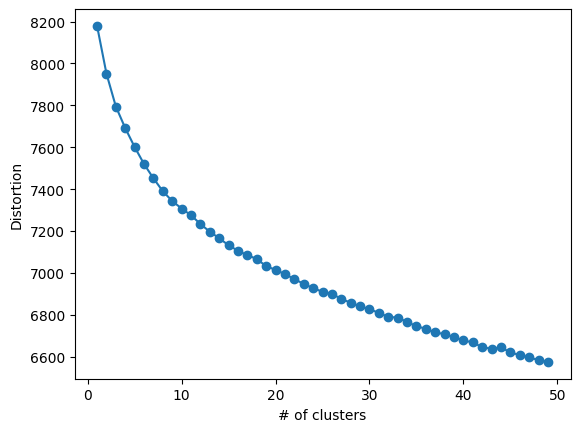

In [167]:
# Calculate distortion for different values of k
import matplotlib.pyplot as plt

distortions =[]

for i in range(1, 50):
    km = KMeans(n_clusters=i, init='random',
               n_init=10, max_iter = 300,
               tol=1e-04, random_state=0)
    km.fit(reduced_embeddings)
    distortions.append(km.inertia_) # sum of within cluser intertia

#plot the distortions

plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.show()


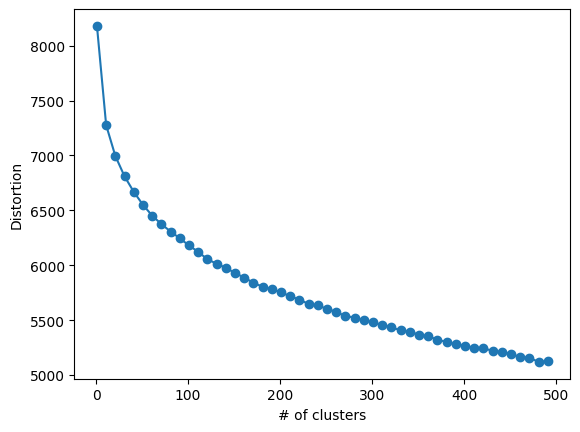

In [168]:
# Calculate distortion for different values of k
import matplotlib.pyplot as plt

distortions =[]

for i in range(1, 500, 10):
    km = KMeans(n_clusters=i, init='random',
               n_init=10, max_iter = 300,
               tol=1e-04, random_state=0)
    km.fit(reduced_embeddings)
    distortions.append(km.inertia_) # sum of within cluser intertia

#plot the distortions

plt.plot(range(1, 500, 10), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.show()


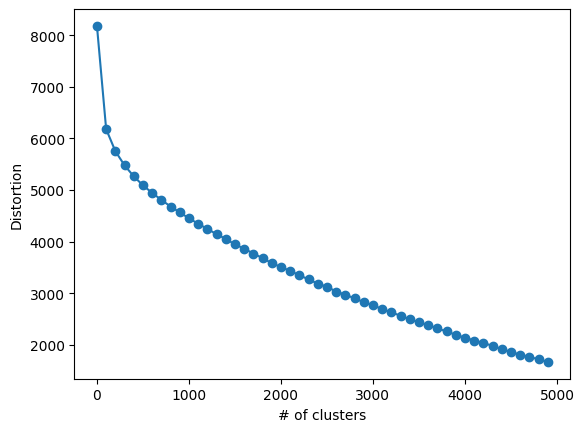

In [169]:
# Calculate distortion for different values of k
import matplotlib.pyplot as plt

distortions =[]

for i in range(1, 5000, 100):
    km = KMeans(n_clusters=i, init='random',
               n_init=10, max_iter = 300,
               tol=1e-04, random_state=0)
    km.fit(reduced_embeddings)
    distortions.append(km.inertia_) # sum of within cluser intertia

#plot the distortions

plt.plot(range(1, 5000, 100), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.show()

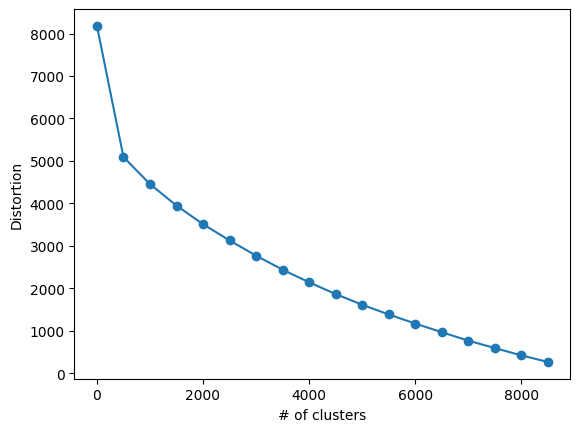

In [170]:
# Calculate distortion for different values of k
import matplotlib.pyplot as plt

distortions =[]

for i in range(1, 9000, 500):
    km = KMeans(n_clusters=i, init='random',
               n_init=10, max_iter = 300,
               tol=1e-04, random_state=0)
    km.fit(reduced_embeddings)
    distortions.append(km.inertia_) # sum of within cluser intertia

#plot the distortions

plt.plot(range(1, 9000, 500), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.show()

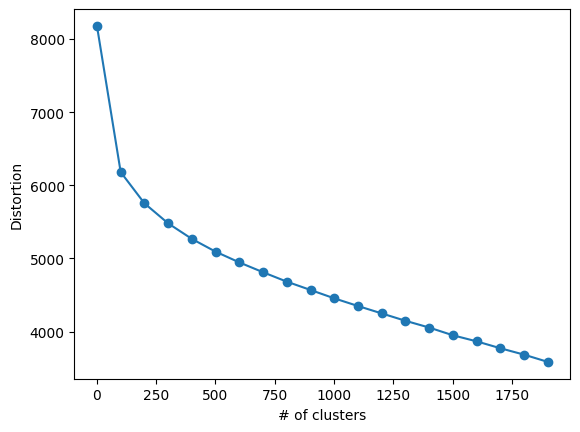

In [171]:
# Calculate distortion for different values of k
import matplotlib.pyplot as plt

distortions =[]

for i in range(1, 2000, 100):
    km = KMeans(n_clusters=i, init='random',
               n_init=10, max_iter = 300,
               tol=1e-04, random_state=0)
    km.fit(reduced_embeddings)
    distortions.append(km.inertia_) # sum of within cluser intertia

#plot the distortions

plt.plot(range(1, 2000, 500), distortions, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.show()

In [174]:
print(np.argmax(distortions), distortions [np.argmax(distortions)])

0 8179.0100557455


In [175]:
distortions

[8179.0100557455,
 6180.222587909531,
 5753.339837660896,
 5479.065583474178,
 5266.112106715109,
 5091.757422603456,
 4944.82691750732,
 4810.380029991631,
 4681.63641531736,
 4567.944581648504,
 4453.551316281732,
 4348.487681833974,
 4247.342721915579,
 4146.434750506567,
 4053.8116673066565,
 3948.208069416236,
 3865.2500251904225,
 3770.795063855618,
 3683.1044494569996,
 3583.9762878416477]

In [176]:
# k-means clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters=100, # generate 100 clusters seems to be location of the elbow
            n_init=10, # run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE
            max_iter=300, # max iterations in a single run
            tol=1e-04, # tolerance to check convergence
            random_state=0,
            init='random'
           )

km.fit(reduced_embeddings)
#y_km= km.fit_predict(reduced_embeddings)
print ('distortion = ', km.inertia_)

distortion =  6194.806462016357


In [177]:
cluster_centers_100 = km.cluster_centers_

print (cluster_centers_100.shape)

(100, 1126)


In [179]:
# insert cluster centers into faiss

import faiss

dimension = cluster_centers_100.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(cluster_centers_100)




In [192]:
test_vector = np.array([df_train_set['q_embedding'][0]])

test_vector.shape

test_vector_transformed = pca.transform(test_vector)

test_vector_transformed.shape

(1, 1126)

In [193]:
k=1
distances, indices =  index.search(test_vector_transformed, k)

In [194]:
print (distances)


print (indices)

[[0.6816695]]
[[60]]


In [203]:
cluster_centers_100[indices[0]]

array([[ 9.12237320e-02, -2.08401123e-03, -3.70156010e-02, ...,
         1.71444343e-03,  1.94312705e-05, -1.81525458e-04]])

In [197]:
df_train_set['q_embedding']

0       [-0.08950918167829514, -0.03391300514340401, 0...
1       [0.004099148791283369, -0.02683788351714611, 0...
2       [-0.03891529515385628, 0.025479756295681, 0.01...
3       [0.01370563730597496, -0.0826801061630249, -0....
4       [-0.018638623878359795, -0.009417288936674595,...
                              ...                        
9422    [-0.03611992299556732, 0.0014869559090584517, ...
9423    [0.009412385523319244, 0.0070473444648087025, ...
9424    [-0.012540570460259914, -0.015642479062080383,...
9425    [-0.004516009707003832, 0.031961213797330856, ...
9426    [0.028366005048155785, -0.020114492624998093, ...
Name: q_embedding, Length: 9427, dtype: object

In [199]:
df_train_set['q_reduced_embedding'] = df_train_set.apply(lambda row: pca.transform([row['q_embedding']]), axis=1)

In [201]:
df_train_set['q_reduced_embedding'][0]

(1, 1126)

In [204]:
def get_nearest_cluster(vector):
    k=1
    distances, indices =  index.search(vector, k)
    return cluster_centers_100[indices[0]]

    


In [205]:
get_nearest_cluster(test_vector_transformed)

array([[ 9.12237320e-02, -2.08401123e-03, -3.70156010e-02, ...,
         1.71444343e-03,  1.94312705e-05, -1.81525458e-04]])

In [206]:
df_train_set['nearest_cluster'] = df_train_set.apply(lambda row: get_nearest_cluster(row['q_reduced_embedding']), axis=1)

In [208]:
df_train_set['nearest_cluster'][10]

array([[ 1.35166019e-01, -2.98709219e-01, -3.55368869e-02, ...,
        -1.28285465e-04,  5.49205333e-04,  3.60548016e-04]])

In [224]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0             False             false                  False   
1              True              true                   True   
2              True              true                   True   
3              True              true                   True   
4             False             false                  False   

                                 q_reduced_embedding  \
0  [[0.10212690556508255, -0.11847124903988505, -...   
1  [[0.1123480367165092, 0.12397016147460162, 0.2...   
2  [[-0.03639576775244268, -0.08696831916438628, ...   
3  [[0.1883798265404862, -0.31258600728919855, 0....   
4  [[0.03156721099608127, -0.30773121590359676, -...   

                                     nearest_cluster  
0  [[0.09122373200232044, -0.0020840112287681964,...  
1  [[0.10135936960178633, 0.1591202671294448, 0.1...  
2  [[-0.2358704854654926, -0.055261400304089735, ...  
3  [[0.15836729524471627, -0.3483161472768474, -0...  
4  [[0.11920299303393654, -0.2911345114153363, -0...

In [211]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   question                9427 non-null   object
 1   answer                  9427 non-null   bool  
 2   passage                 9427 non-null   object
 3   q_embedding             9427 non-null   object
 4   gpt4o_answer            9415 non-null   object
 5   gpt4o_answer_bool       9392 non-null   object
 6   gpt4o-mini_answer       9416 non-null   object
 7   gpt4o-mini_answer_bool  9401 non-null   object
 8   q_reduced_embedding     9427 non-null   object
 9   nearest_cluster         9427 non-null   object
dtypes: bool(1), object(9)
memory usage: 672.2+ KB


In [214]:
type(df_train_set['q_reduced_embedding'][0])

numpy.ndarray

In [227]:
type(df_train_set['q_reduced_embedding'])

pandas.core.series.Series

In [228]:
df_train_set['q_reduced_embedding'][0].flatten()

array([ 0.10212691, -0.11847125, -0.08954644, ...,  0.00662005,
       -0.0017041 ,  0.00038881])

In [220]:
type(df_train_set['q_embedding'][0])

list

In [231]:
df_train_set['q_reduced_embedding'] = df_train_set['q_reduced_embedding'].apply (lambda x: x.flatten())


In [232]:
df_train_set['nearest_cluster'] = df_train_set['nearest_cluster'].apply (lambda x: x.flatten())

In [233]:
df_train_set.to_parquet('train_set_with_gpt_clustercenters.parquet')

In [236]:
def get_answer2(question, cluster_embedding, model):
    try:
        # Get embedding for the query
        #query_embedding = get_embedding(question, 'text-embedding-3-small')

        # Convert the embedding into a string format (simple join of numbers as an example)
        embedding_as_text = ' '.join(map(str, cluster_embedding))

        # Craft a prompt using the embedding as a context
        #question = [{'role':'user', 'content': f"Answer the following question based on the following embedding context: {embedding_as_text}\nQuestion: {query}\nAnswer:"}]

        question = [{'role':'user','content': f'Answer the following question using the following embedding context: {embedding_as_text}. Answer should be stricly boolean. Avoid punctuation in the answer. The question is ### {question} ###'}]
        
        response = client.chat.completions.create(
        model=model,
        messages=question,
        temperature=0)
        
        return response.choices[0].message.content
    except Exception as e:
         # If an error occurs, print the question and the error message
        print(f"Error processing question: {question}")
        print(f"Error message: {e}")
        return None

In [238]:
df_train_set

question  answer  \
0       do iran and afghanistan speak the same language    True   
1     do good samaritan laws protect those who help ...    True   
2     is windows movie maker part of windows essentials    True   
3     is confectionary sugar the same as powdered sugar    True   
4            is elder scrolls online the same as skyrim   False   
...                                                 ...     ...   
9422             is a us district court a federal court    True   
9423  can a tenant get a restraining order against a...    True   
9424       is the golden state warriors in the playoffs    True   
9425             downton abbey will there be a season 7   False   
9426  is margin of error the same as confidence inte...   False   

                                                passage  \
0     Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1     Good Samaritan laws offer legal protection to ...   
2     Windows Movie Maker (formerly known as Windows...   
3     Powdered sugar, also called confectioners' sug...   
4     As with other games in The Elder Scrolls serie...   
...                                                 ...   
9422  The United States district courts are the gene...   
9423  If a landlord is found to be retaliating, he o...   
9424  The Warriors went into the 2018 playoffs as th...   
9425  Downton Abbey is a British period drama televi...   
9426  The margin of error is usually defined as the ...   

                                            q_embedding gpt4o_answer  \
0     [-0.08950918167829514, -0.03391300514340401, 0...        False   
1     [0.004099148791283369, -0.02683788351714611, 0...         true   
2     [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3     [0.01370563730597496, -0.0826801061630249, -0....         true   
4     [-0.018638623878359795, -0.009417288936674595,...           no   
...                                                 ...          ...   
9422  [-0.03611992299556732, 0.0014869559090584517, ...         True   
9423  [0.009412385523319244, 0.0070473444648087025, ...         true   
9424  [-0.012540570460259914, -0.015642479062080383,...      Unknown   
9425  [-0.004516009707003832, 0.031961213797330856, ...           No   
9426  [0.028366005048155785, -0.020114492624998093, ...           no   

     gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0                False             false                  False   
1                 True              true                   True   
2                 True              true                   True   
3                 True              true                   True   
4                False             false                  False   
...                ...               ...                    ...   
9422              True              true                   True   
9423              True              true                   True   
9424              None              true                   True   
9425             False             false                  False   
9426             False             false                  False   

                                    q_reduced_embedding  \
0     [0.10212690556508255, -0.11847124903988505, -0...   
1     [0.1123480367165092, 0.12397016147460162, 0.23...   
2     [-0.03639576775244268, -0.08696831916438628, 0...   
3     [0.1883798265404862, -0.31258600728919855, 0.0...   
4     [0.03156721099608127, -0.30773121590359676, -0...   
...                                                 ...   
9422  [0.1777807281397135, 0.0774454270958628, 0.151...   
9423  [0.10989027363029161, 0.14813948426054036, 0.2...   
9424  [-0.03973797420501076, 0.11491831972419783, -0...   
9425  [-0.3716530479772956, 0.07421735296778666, -0....   
9426  [0.21595914496125626, -0.29084742186040397, -0...   

                                        nearest_cluster  
0     [0.09122373200232044, -0.0020840112287681964, ...  
1     [0.10135936960178633, 0.15912026

In [239]:
df_train_set_5 = df_train_set.head()

In [242]:
df_train_set_5

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0             False             false                  False   
1              True              true                   True   
2              True              true                   True   
3              True              true                   True   
4             False             false                  False   

                                 q_reduced_embedding  \
0  [0.10212690556508255, -0.11847124903988505, -0...   
1  [0.1123480367165092, 0.12397016147460162, 0.23...   
2  [-0.03639576775244268, -0.08696831916438628, 0...   
3  [0.1883798265404862, -0.31258600728919855, 0.0...   
4  [0.03156721099608127, -0.30773121590359676, -0...   

                                     nearest_cluster  
0  [0.09122373200232044, -0.0020840112287681964, ...  
1  [0.10135936960178633, 0.1591202671294448, 0.16...  
2  [-0.2358704854654926, -0.055261400304089735, 0...  
3  [0.15836729524471627, -0.3483161472768474, -0....  
4  [0.11920299303393654, -0.2911345114153363, -0....

In [246]:
df_train_set_5['question']

0      do iran and afghanistan speak the same language
1    do good samaritan laws protect those who help ...
2    is windows movie maker part of windows essentials
3    is confectionary sugar the same as powdered sugar
4           is elder scrolls online the same as skyrim
Name: question, dtype: object

In [253]:
df_train_set_5.apply(lambda row: get_answer2(row['question'], row['nearest_cluster'], 'gpt4o'),axis=1)

0      No
1    true
2     yes
3     yes
4      no
dtype: object

In [251]:
df_train_set_5['answer']

0     True
1     True
2     True
3     True
4    False
Name: answer, dtype: bool

In [255]:
df_train_set['gpt4o_answer_wemb'] = df_train_set.apply(lambda row: get_answer2(row['question'], row['nearest_cluster'], 'gpt4o'),axis=1)

Error processing question: [{'role': 'user', 'content': 'Answer the following question using the following embedding context: 0.059867854207635046 -0.03438582499940359 0.0053389528334693605 0.07365492116622624 -0.01994276592673834 0.10392495288557058 0.08182952378166676 0.03800555377708121 -0.06993691067230938 -0.015530561406947788 -0.018621579462577077 0.06306393266147572 -0.00445629743379964 0.11199013721674769 -0.09542445046037218 -0.05953353390510296 0.009097191437800996 0.036597803677723736 0.03723206432239746 0.011356946521845199 -0.016672529799894486 0.04145619648775125 0.03853590548660015 0.006721609435203973 0.02067140367450388 -0.01228394929756518 0.05795786484941432 0.05087590675665333 -0.04482039416681082 -0.002622195467035545 0.0045612745335413575 -0.029606294735779744 0.0009213223598718188 -0.013493401204145357 -0.040396177721739784 0.03405020527395795 0.02258930873677059 -0.00679459034077016 0.029377568245680365 0.06119086257430749 0.04776621979962731 0.0510286189969232 

In [256]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0             False             false                  False   
1              True              true                   True   
2              True              true                   True   
3              True              true                   True   
4             False             false                  False   

                                 q_reduced_embedding  \
0  [0.10212690556508255, -0.11847124903988505, -0...   
1  [0.1123480367165092, 0.12397016147460162, 0.23...   
2  [-0.03639576775244268, -0.08696831916438628, 0...   
3  [0.1883798265404862, -0.31258600728919855, 0.0...   
4  [0.03156721099608127, -0.30773121590359676, -0...   

                                     nearest_cluster gpt4o_answer_wemb  
0  [0.09122373200232044, -0.0020840112287681964, ...                no  
1  [0.10135936960178633, 0.1591202671294448, 0.16...               yes  
2  [-0.2358704854654926, -0.055261400304089735, 0...               yes  
3  [0.15836729524471627, -0.3483161472768474, -0....               yes  
4  [0.11920299303393654, -0.2911345114153363, -0....                no

In [260]:
df_train_set.to_parquet('train_set_with_gpt4o_answers_using_clusterembedding.parquet')

In [259]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0             False             false                  False   
1              True              true                   True   
2              True              true                   True   
3              True              true                   True   
4             False             false                  False   

                                 q_reduced_embedding  \
0  [0.10212690556508255, -0.11847124903988505, -0...   
1  [0.1123480367165092, 0.12397016147460162, 0.23...   
2  [-0.03639576775244268, -0.08696831916438628, 0...   
3  [0.1883798265404862, -0.31258600728919855, 0.0...   
4  [0.03156721099608127, -0.30773121590359676, -0...   

                                     nearest_cluster gpt4o_answer_wemb  
0  [0.09122373200232044, -0.0020840112287681964, ...                no  
1  [0.10135936960178633, 0.1591202671294448, 0.16...               yes  
2  [-0.2358704854654926, -0.055261400304089735, 0...               yes  
3  [0.15836729524471627, -0.3483161472768474, -0....               yes  
4  [0.11920299303393654, -0.2911345114153363, -0....                no

In [261]:
df_train_set['gpt4o_answer_wemb'].value_counts()

gpt4o_answer_wemb
yes            4377
no             3857
No              413
true            276
False           142
Yes             137
false           117
True             48
summer            1
tokyo drift       1
die               1
fiction           1
Name: count, dtype: int64

In [262]:
# Map the possible string values to True, False, or None
df_train_set['gpt4o_answer_wemb_bool'] = df_train_set['gpt4o_answer_wemb'].map(
    lambda x: True if x in ['true', 'yes', 'Yes', 'True'] 
              else False if x in ['no', 'False', 'false', 'No'] 
              else None
)


In [263]:
df_train_set.shape

(9427, 12)

In [264]:
df_train_set['gpt4o_answer_wemb_bool'].value_counts()

gpt4o_answer_wemb_bool
True     4838
False    4529
Name: count, dtype: int64

In [265]:
# Accuracy of GPT-4o with embeddings
import string

correct_predictions = (df_train_set['answer'] == df_train_set['gpt4o_answer_wemb_bool']).sum()
total_predictions = len(df_train_set)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [267]:
df_train_set['gpt4o-mini_answer_wemb'] = df_train_set.apply(lambda row: get_answer2(row['question'], row['nearest_cluster'], 'gpt-4o-mini'),axis=1)

Error processing question: [{'role': 'user', 'content': 'Answer the following question using the following embedding context: 0.1056783824549864 -0.05983551851770617 -0.003272404703737327 0.08009781528950538 0.023647323196059427 0.0940535003848635 0.09005087531986744 0.07190476967694852 0.067367114076793 0.031679428540646384 0.1544977174157841 0.0030706059869288664 -0.0527815377693412 0.02067412067073723 -0.09625790306260595 0.020159360749412093 -0.008262734789950639 -0.043526407669957266 0.031142137239283274 -0.028509904103103893 -0.0028989805817905053 0.0045787793689921735 0.012901507210348412 0.05105485845752373 -0.1157659265594128 0.055399013334043574 -0.08582060295813367 0.025524699495529886 0.02566850846126463 0.0026474980808779995 -0.019580288068655964 -0.024523476613941712 0.002906412811957981 0.026129723946889432 0.00949746289777692 -0.011791236401091263 0.02842110781404048 -0.02066962564451411 0.003614767664650183 0.023540632958499202 -0.02098123092672137 -0.03449197712466806

In [268]:
df_train_set.to_parquet('train_set_with_gpt4o_gpt4omini_answers_using_clusterembedding.parquet')

In [2]:
df_train_set = pd.read_parquet('train_set_with_gpt4o_gpt4omini_answers_using_clusterembedding.parquet')

In [4]:
df_train_set.head()

question  answer  \
0    do iran and afghanistan speak the same language    True   
1  do good samaritan laws protect those who help ...    True   
2  is windows movie maker part of windows essentials    True   
3  is confectionary sugar the same as powdered sugar    True   
4         is elder scrolls online the same as skyrim   False   

                                             passage  \
0  Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...   
1  Good Samaritan laws offer legal protection to ...   
2  Windows Movie Maker (formerly known as Windows...   
3  Powdered sugar, also called confectioners' sug...   
4  As with other games in The Elder Scrolls serie...   

                                         q_embedding gpt4o_answer  \
0  [-0.08950918167829514, -0.03391300514340401, 0...        False   
1  [0.004099148791283369, -0.02683788351714611, 0...         true   
2  [-0.03891529515385628, 0.025479756295681, 0.01...         true   
3  [0.01370563730597496, -0.0826801061630249, -0....         true   
4  [-0.018638623878359795, -0.009417288936674595,...           no   

  gpt4o_answer_bool gpt4o-mini_answer gpt4o-mini_answer_bool  \
0             False             false                  False   
1              True              true                   True   
2              True              true                   True   
3              True              true                   True   
4             False             false                  False   

                                 q_reduced_embedding  \
0  [0.10212690556508255, -0.11847124903988505, -0...   
1  [0.1123480367165092, 0.12397016147460162, 0.23...   
2  [-0.03639576775244268, -0.08696831916438628, 0...   
3  [0.1883798265404862, -0.31258600728919855, 0.0...   
4  [0.03156721099608127, -0.30773121590359676, -0...   

                                     nearest_cluster gpt4o_answer_wemb  \
0  [0.09122373200232044, -0.0020840112287681964, ...                no   
1  [0.10135936960178633, 0.1591202671294448, 0.16...               yes   
2  [-0.2358704854654926, -0.055261400304089735, 0...               yes   
3  [0.15836729524471627, -0.3483161472768474, -0....               yes   
4  [0.11920299303393654, -0.2911345114153363, -0....                no   

  gpt4o_answer_wemb_bool gpt4o-mini_answer_wemb  
0                  False                  false  
1                   True                   true  
2                   True                   true  
3                   True                   true  
4                  False                  false

In [5]:
df_train_set['gpt4o-mini_answer_wemb'].value_counts()

gpt4o-mini_answer_wemb
true               5031
false              4106
no                   87
yes                   8
unknown               2
Julius Campbell       1
davy crockett         1
Song of Solomon       1
Los Angeles           1
Dean Winters          1
he dies               1
Name: count, dtype: int64

In [6]:
# Map the possible string values to True, False, or None
df_train_set['gpt4o-mini_answer_wemb_bool'] = df_train_set['gpt4o-mini_answer_wemb'].map(
    lambda x: True if x in ['true', 'yes', 'Yes', 'True'] 
              else False if x in ['no', 'False', 'false', 'No'] 
              else None
)

In [7]:
df_train_set['gpt4o-mini_answer_wemb_bool'].value_counts()

gpt4o-mini_answer_wemb_bool
True     5039
False    4193
Name: count, dtype: int64

In [8]:
# Accuracy of GPT-4o-mini with embeddings
import string

correct_predictions = (df_train_set['answer'] == df_train_set['gpt4o-mini_answer_wemb_bool']).sum()
total_predictions = len(df_train_set)

# Compute accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68
